## Library Importation

In [ ]:
import optuna
import pandas as pd

from hp_pred.test_model import TestModel

optuna.logging.set_verbosity(optuna.logging.WARNING)

c:\Users\pret.PORTPRETLAMIH11\Desktop\hp_pred\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load and format data

In [3]:
test = pd.read_parquet("data/features_extraction_trends/test.parquet")
train = pd.read_parquet("data/features_extraction_trends/train.parquet")
feature_names = list(test)[:-4]

test2 = pd.read_parquet("data/features_extraction_integrated_2windows/test.parquet")
train2 = pd.read_parquet("data/features_extraction_integrated_2windows/train.parquet")
feature_names2 = list(test2)[:-4]

## Our XGBoost Model ( with trends of the Holt's prediction) vs Trends XGBoost Model

Model XGBoost_Trend_Model loaded
Number of points in test data: 47028
Prevalence of hypotension: 6.02%
---
Model XGBoost_Model_Holt_Trends loaded
Number of points in test data: 41334
Prevalence of hypotension: 5.45%
---
Computing baseline for XGBoost_Trend_Model...


100%|██████████| 200/200 [00:13<00:00, 14.63it/s]


Computing baseline for XGBoost_Model_Holt_Trends...


100%|██████████| 200/200 [00:11<00:00, 17.14it/s]


Testing model XGBoost_Trend_Model...


100%|██████████| 200/200 [00:15<00:00, 13.00it/s]


Testing model XGBoost_Model_Holt_Trends...


100%|██████████| 200/200 [00:14<00:00, 14.12it/s]




Results for XGBoost_Comparison

===== Results for XGBoost_Trend_Model =====
Baseline:
AUC: 0.80 (0.00)
AP: 0.23 (0.01)
AUPRC: 0.28 [0.27, 0.29]
Threshold: 66.14 [66.14, 66.71]
Recall: 36.9% [35.5%, 38.2%]
Precision: 36.2% (1.5%)
Specificity: 97.1% [96.9%, 97.3%]
NPV: 99.6% [99.6%, 99.6%]
F1-score: 36.5% [35.5%, 37.5%]

Model:
AUC: 0.86 (0.00)
AP: 0.32 (0.01)
AUPRC: 0.42 [0.41, 0.43]
Threshold: 0.42 [0.42, 0.43]
Recall: 36.9% [36.8%, 37.0%]
Precision: 48.9% (2.1%)
Specificity: 98.3% (0.1%)
NPV: 99.6% (0.0%)
F1-score: 42.0% (0.8%)
----------------------------

===== Results for XGBoost_Model_Holt_Trends =====
Baseline:
AUC: 0.83 (0.01)
AP: 0.24 (0.01)
AUPRC: 0.29 (0.01)
Threshold: 66.71 [66.14, 67.50]
Recall: 41.0% [38.6%, 47.9%]
Precision: 36.7% (1.4%)
Specificity: 97.9% [97.6%, 98.1%]
NPV: 99.7% [99.7%, 99.7%]
F1-score: 39.3% [37.4%, 41.2%]

Model:
AUC: 0.86 (0.00)
AP: 0.32 (0.01)
AUPRC: 0.45 (0.02)
Threshold: 0.38 [0.37, 0.39]
Recall: 41.0% [40.9%, 41.1%]
Precision: 47.5% [45.9%, 49

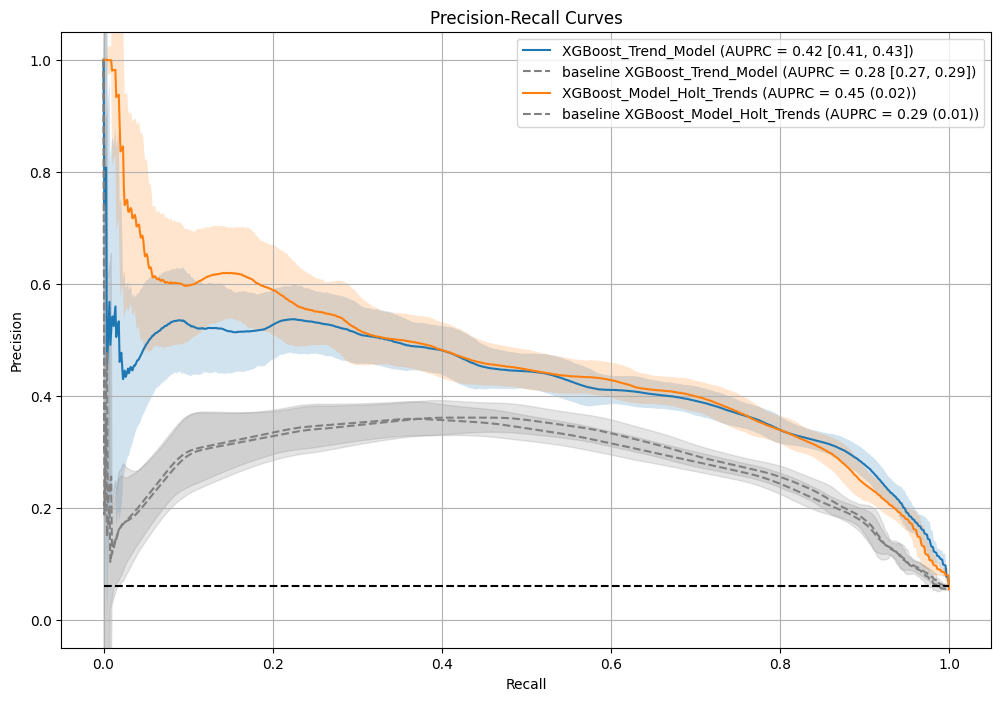

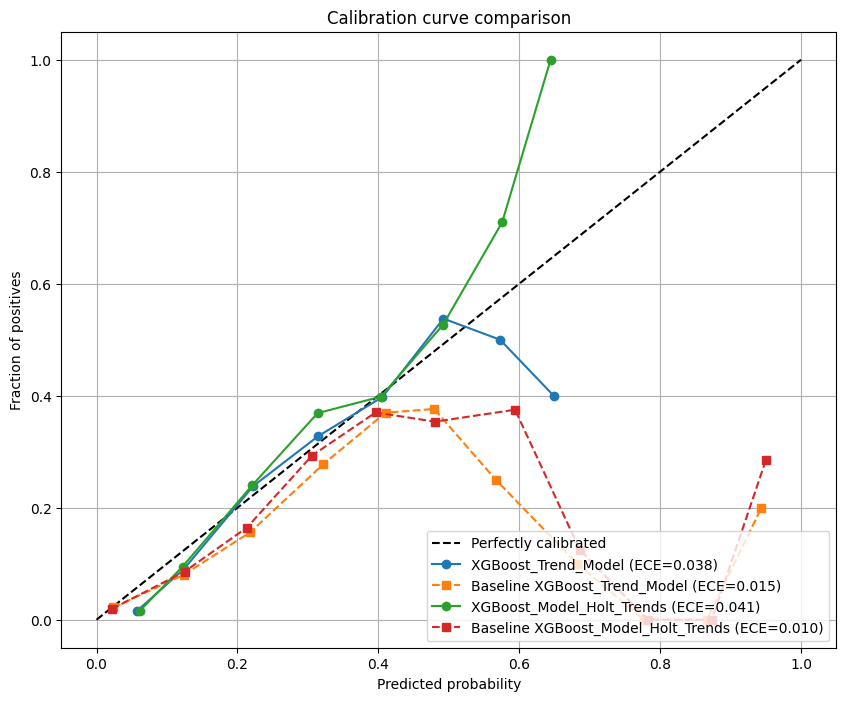

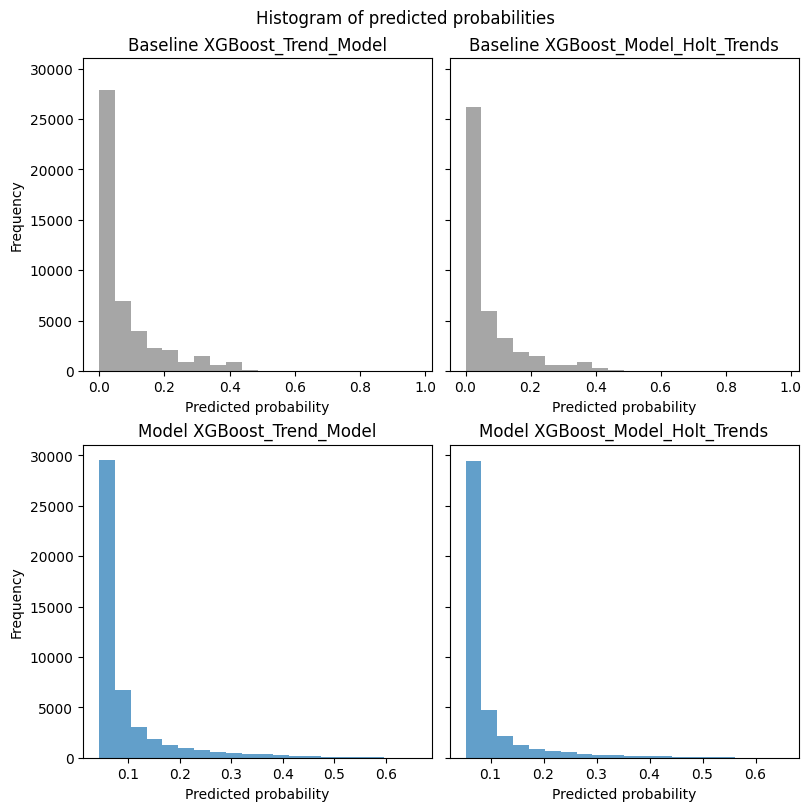

In [4]:
model_configs = [
    {
        'test_data': test,
        'train_data': train,
        'model_filename': 'xgb_30_s_trend.json',
        'features_names': feature_names,
        'name': 'XGBoost_Trend_Model',
        'model_type': 'xgboost'
    },
    {
        'test_data': test2,
        'train_data': train2,
        'model_filename': 'xgb_30_s_reg_holt_med.json',
        'features_names': feature_names2,
        'name': 'XGBoost_Model_Holt_Trends',
        'model_type': 'xgboost'
    },
]
evaluator = TestModel(
    model_configs=model_configs,
    output_name="XGBoost_Comparison")

evaluator.run(True, True)

### Shap Analysis

Computing SHAP values for XGBoost_Model_Trends...


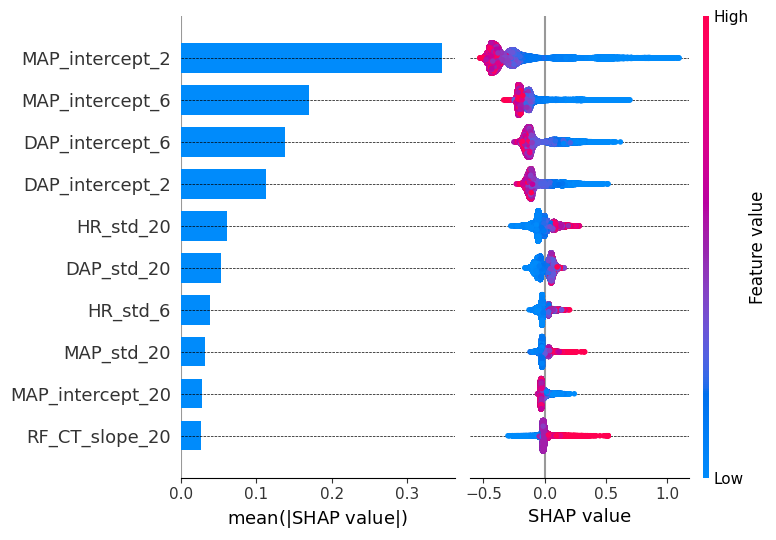

In [15]:
evaluator.compute_shap_values(1)
evaluator.plot_shap_values()
evaluator.group_shap_values()

## XGBoost model vs Categorical XGBoost model

In [7]:
dataset_name = '30_s_dataset_reg_signal'

test = pd.read_parquet("data/features_extraction_integrated_2windows/test.parquet")
train = pd.read_parquet("data/features_extraction_integrated_2windows/train.parquet")
features_names = list(test)[:-4]


test2 = pd.read_parquet("data/features_extraction_test_categoricals/test.parquet")
train2 = pd.read_parquet("data/features_extraction_test_categoricals/train.parquet")
features_names2 = list(test2)[:-4]

model_configs = [
    {
        'test_data': test,
        'train_data': train,
        'model_filename': 'xgb_30_s_reg_holt_med.json',
        'features_names': features_names,
        'name': 'XGBoost_Model',
        'model_type': 'xgboost'
    },
    {
        'test_data': test2,
        'train_data': train2,
        'model_filename': 'xgb_30_s_reg_holt_med_categorical.json',
        'features_names': features_names2,
        'name': 'XGBoost_Model_Categoricals',
        'model_type': 'xgboost'
    }
]

Model XGBoost_Model loaded
Number of points in test data: 41334
Prevalence of hypotension: 5.45%
---
Model XGBoost_Model_Categoricals loaded
Number of points in test data: 49077
Prevalence of hypotension: 6.01%
---
Computing baseline for XGBoost_Model...


100%|██████████| 200/200 [00:11<00:00, 17.11it/s]


Computing baseline for XGBoost_Model_Categoricals...


100%|██████████| 200/200 [00:14<00:00, 14.27it/s]


Testing model XGBoost_Model...


100%|██████████| 200/200 [00:14<00:00, 14.23it/s]


Testing model XGBoost_Model_Categoricals...


100%|██████████| 200/200 [00:15<00:00, 13.32it/s]




Results for Stacking

===== Results for XGBoost_Model =====
Baseline:
AUC: 0.83 (0.01)
AP: 0.24 (0.01)
AUPRC: 0.29 (0.01)
Threshold: 66.71 [66.14, 67.50]
Recall: 41.0% [38.6%, 47.9%]
Precision: 36.7% (1.4%)
Specificity: 97.9% [97.6%, 98.1%]
NPV: 99.7% [99.7%, 99.7%]
F1-score: 39.3% [37.4%, 41.2%]

Model:
AUC: 0.86 (0.00)
AP: 0.32 (0.01)
AUPRC: 0.45 (0.02)
Threshold: 0.38 [0.37, 0.39]
Recall: 41.0% [40.9%, 41.1%]
Precision: 47.6% [45.9%, 49.4%]
Specificity: 98.6% (0.1%)
NPV: 99.7% (0.0%)
F1-score: 44.1% (1.1%)
----------------------------

===== Results for XGBoost_Model_Categoricals =====
Baseline:
AUC: 0.80 (0.00)
AP: 0.23 (0.01)
AUPRC: 0.28 (0.01)
Threshold: 66.14 [66.14, 66.50]
Recall: 36.0% [34.8%, 37.1%]
Precision: 35.9% (1.4%)
Specificity: 97.1% [96.9%, 97.3%]
NPV: 99.6% [99.6%, 99.6%]
F1-score: 35.9% [34.9%, 36.7%]

Model:
AUC: 0.85 [0.85, 0.85]
AP: 0.30 (0.01)
AUPRC: 0.41 (0.02)
Threshold: 0.26 [0.26, 0.26]
Recall: 36.0% [35.8%, 36.1%]
Precision: 48.1% (2.1%)
Specificity: 98.

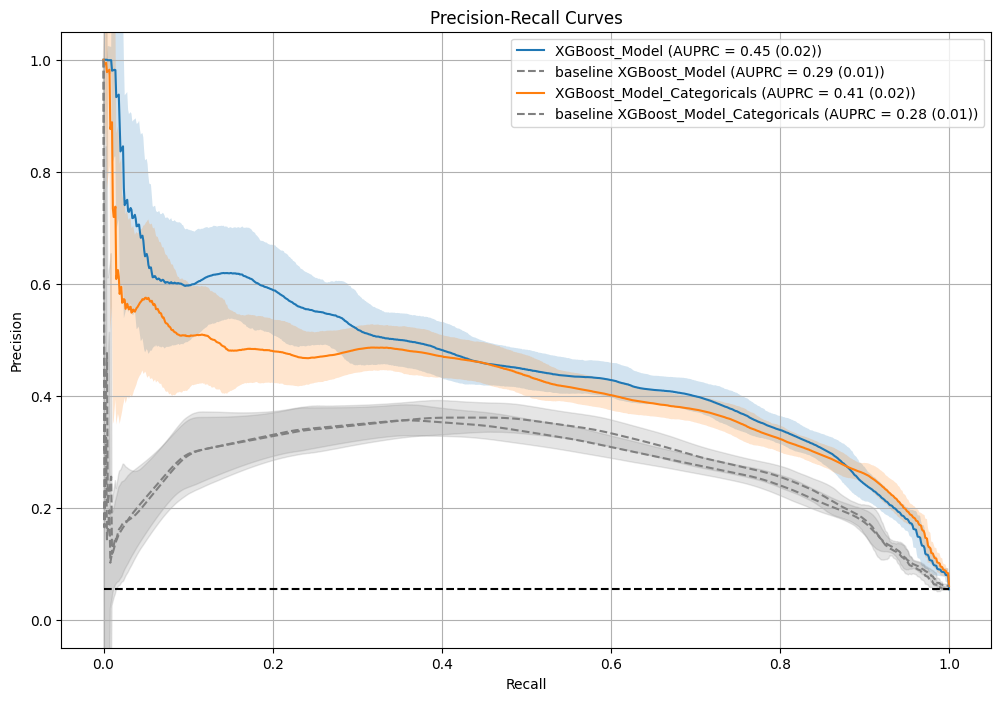

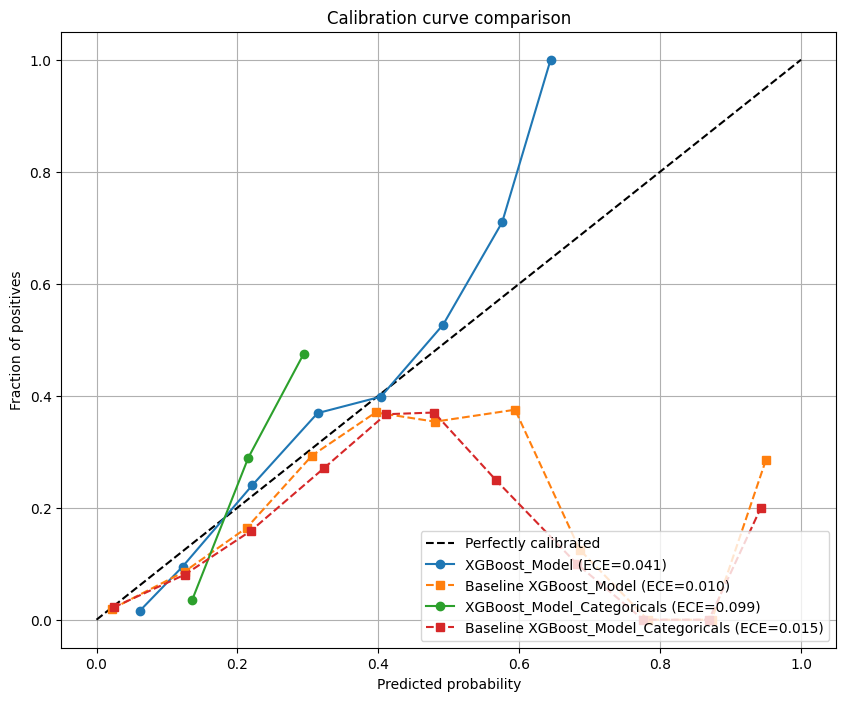

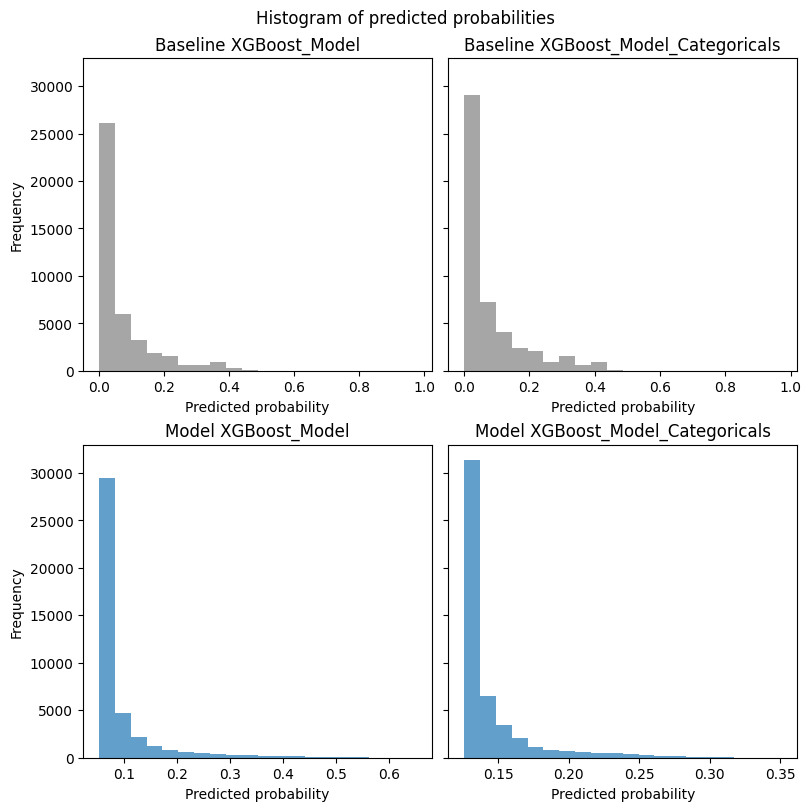

In [8]:
evaluator = TestModel(
    model_configs=model_configs,
    output_name="Stacking")

evaluator.run(True, True)

In [ ]:
evaluator.compute_shap_values(3)
evaluator.plot_shap_values()
evaluator.group_shap_values()
evaluator.plot_shap_grouped()

## Evaluation of 10 XGBoost models with different splits

Model XGBoost_Model_0 loaded
Number of points in test data: 42808
Prevalence of hypotension: 5.46%
---
Model XGBoost_Model_1 loaded
Number of points in test data: 42699
Prevalence of hypotension: 5.02%
---
Model XGBoost_Model_2 loaded
Number of points in test data: 42688
Prevalence of hypotension: 5.63%
---
Model XGBoost_Model_3 loaded
Number of points in test data: 41811
Prevalence of hypotension: 5.00%
---
Model XGBoost_Model_4 loaded
Number of points in test data: 43997
Prevalence of hypotension: 4.41%
---
Model XGBoost_Model_5 loaded
Number of points in test data: 43544
Prevalence of hypotension: 5.16%
---
Model XGBoost_Model_6 loaded
Number of points in test data: 43488
Prevalence of hypotension: 5.11%
---
Model XGBoost_Model_7 loaded
Number of points in test data: 40907
Prevalence of hypotension: 5.79%
---
Model XGBoost_Model_8 loaded
Number of points in test data: 42524
Prevalence of hypotension: 4.41%
---
Model XGBoost_Model_9 loaded
Number of points in test data: 41566
Prevale


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
100%|██████████| 200/200 [00:13<00:00, 14.37it/s]


Computing baseline for XGBoost_Model_1...


100%|██████████| 200/200 [00:13<00:00, 15.08it/s]


Computing baseline for XGBoost_Model_2...


100%|██████████| 200/200 [00:11<00:00, 17.14it/s]


Computing baseline for XGBoost_Model_3...


100%|██████████| 200/200 [00:11<00:00, 17.83it/s]


Computing baseline for XGBoost_Model_4...


100%|██████████| 200/200 [00:11<00:00, 17.14it/s]


Computing baseline for XGBoost_Model_5...


100%|██████████| 200/200 [00:11<00:00, 17.65it/s]


Computing baseline for XGBoost_Model_6...


100%|██████████| 200/200 [00:11<00:00, 17.48it/s]


Computing baseline for XGBoost_Model_7...


100%|██████████| 200/200 [00:10<00:00, 18.59it/s]


Computing baseline for XGBoost_Model_8...


100%|██████████| 200/200 [00:10<00:00, 19.30it/s]


Computing baseline for XGBoost_Model_9...


100%|██████████| 200/200 [00:10<00:00, 18.48it/s]


Testing model XGBoost_Model_0...


100%|██████████| 200/200 [00:13<00:00, 14.95it/s]


Testing model XGBoost_Model_1...


100%|██████████| 200/200 [00:12<00:00, 15.53it/s]


Testing model XGBoost_Model_2...


100%|██████████| 200/200 [00:13<00:00, 14.85it/s]


Testing model XGBoost_Model_3...


100%|██████████| 200/200 [00:13<00:00, 15.33it/s]


Testing model XGBoost_Model_4...


100%|██████████| 200/200 [00:12<00:00, 15.82it/s]


Testing model XGBoost_Model_5...


100%|██████████| 200/200 [00:13<00:00, 15.30it/s]


Testing model XGBoost_Model_6...


100%|██████████| 200/200 [00:13<00:00, 15.26it/s]


Testing model XGBoost_Model_7...


100%|██████████| 200/200 [00:13<00:00, 14.34it/s]


Testing model XGBoost_Model_8...


100%|██████████| 200/200 [00:12<00:00, 16.26it/s]


Testing model XGBoost_Model_9...


100%|██████████| 200/200 [00:13<00:00, 14.81it/s]




Results for XGBoost_Models_Comparison

===== Results for XGBoost_Model_0 =====
Baseline:
AUC: 0.83 (0.00)
AP: 0.24 (0.01)
AUPRC: 0.29 (0.01)
Threshold: 66.14 [65.21, 66.43]
Recall: 38.9% [21.7%, 41.2%]
Precision: 35.5% [34.4%, 36.8%]
Specificity: 97.4% [95.6%, 97.8%]
NPV: 99.7% [99.6%, 99.7%]
F1-score: 36.3% [26.3%, 38.5%]

Model:
AUC: 0.86 (0.00)
AP: 0.30 (0.01)
AUPRC: 0.40 (0.02)
Threshold: 0.32 [0.31, 0.32]
Recall: 38.9% [38.8%, 39.1%]
Precision: 43.9% (2.0%)
Specificity: 98.3% (0.1%)
NPV: 99.7% (0.0%)
F1-score: 41.2% (0.9%)
----------------------------

===== Results for XGBoost_Model_1 =====
Baseline:
AUC: 0.83 (0.00)
AP: 0.23 (0.01)
AUPRC: 0.28 (0.01)
Threshold: 66.14 [65.57, 66.71]
Recall: 34.9% [24.9%, 38.6%]
Precision: 36.6% [35.8%, 38.0%]
Specificity: 97.5% [96.7%, 97.9%]
NPV: 99.7% [99.6%, 99.7%]
F1-score: 35.8% [30.0%, 38.3%]

Model:
AUC: 0.87 (0.00)
AP: 0.29 (0.01)
AUPRC: 0.40 (0.02)
Threshold: 0.44 [0.43, 0.45]
Recall: 34.9% [34.8%, 35.1%]
Precision: 44.3% (2.3%)
Specif

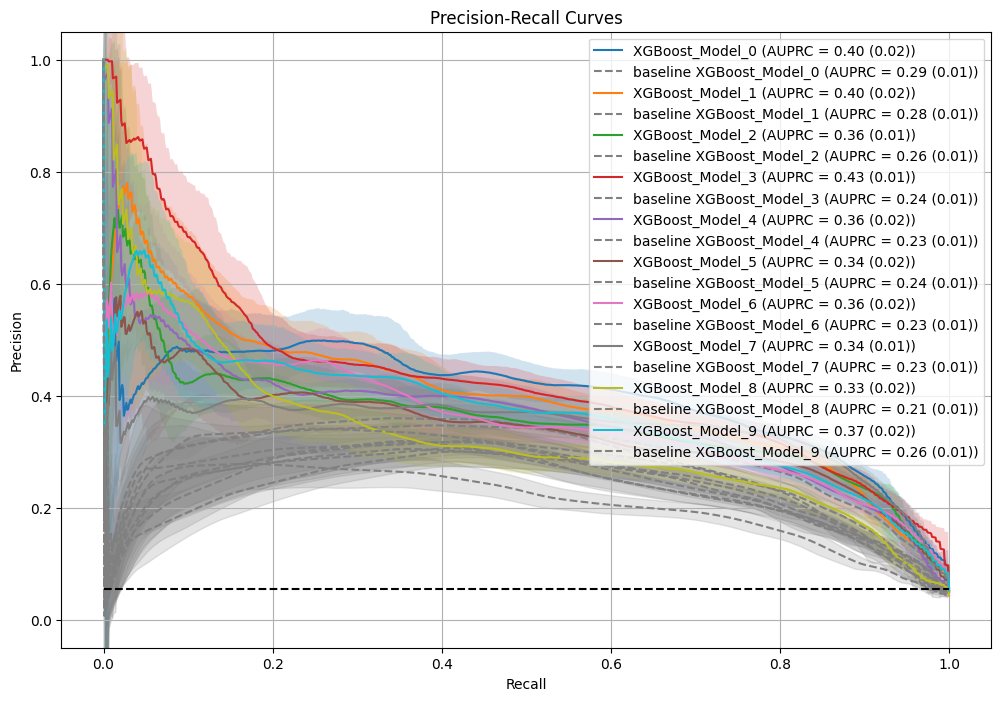

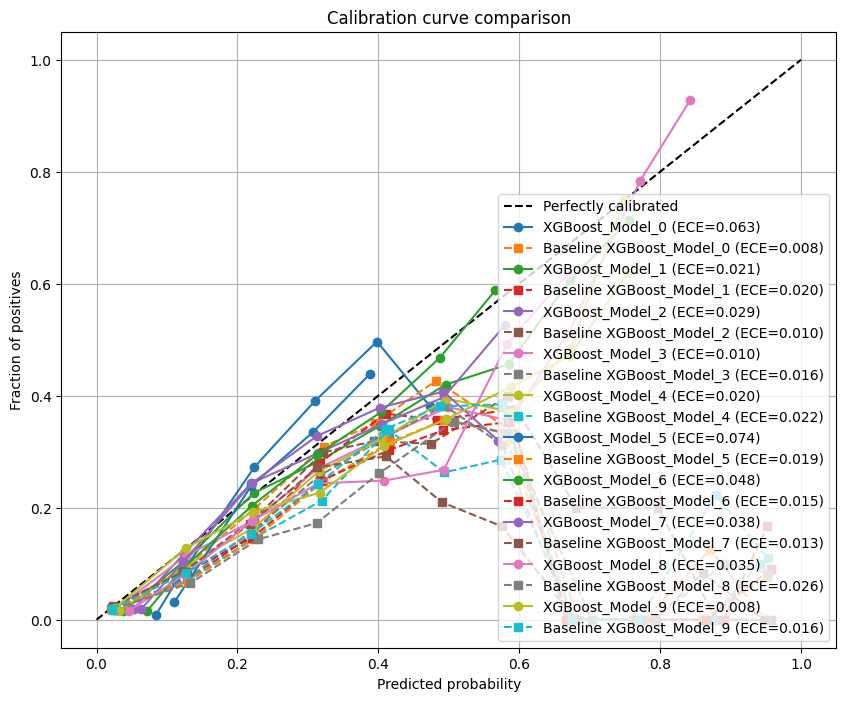

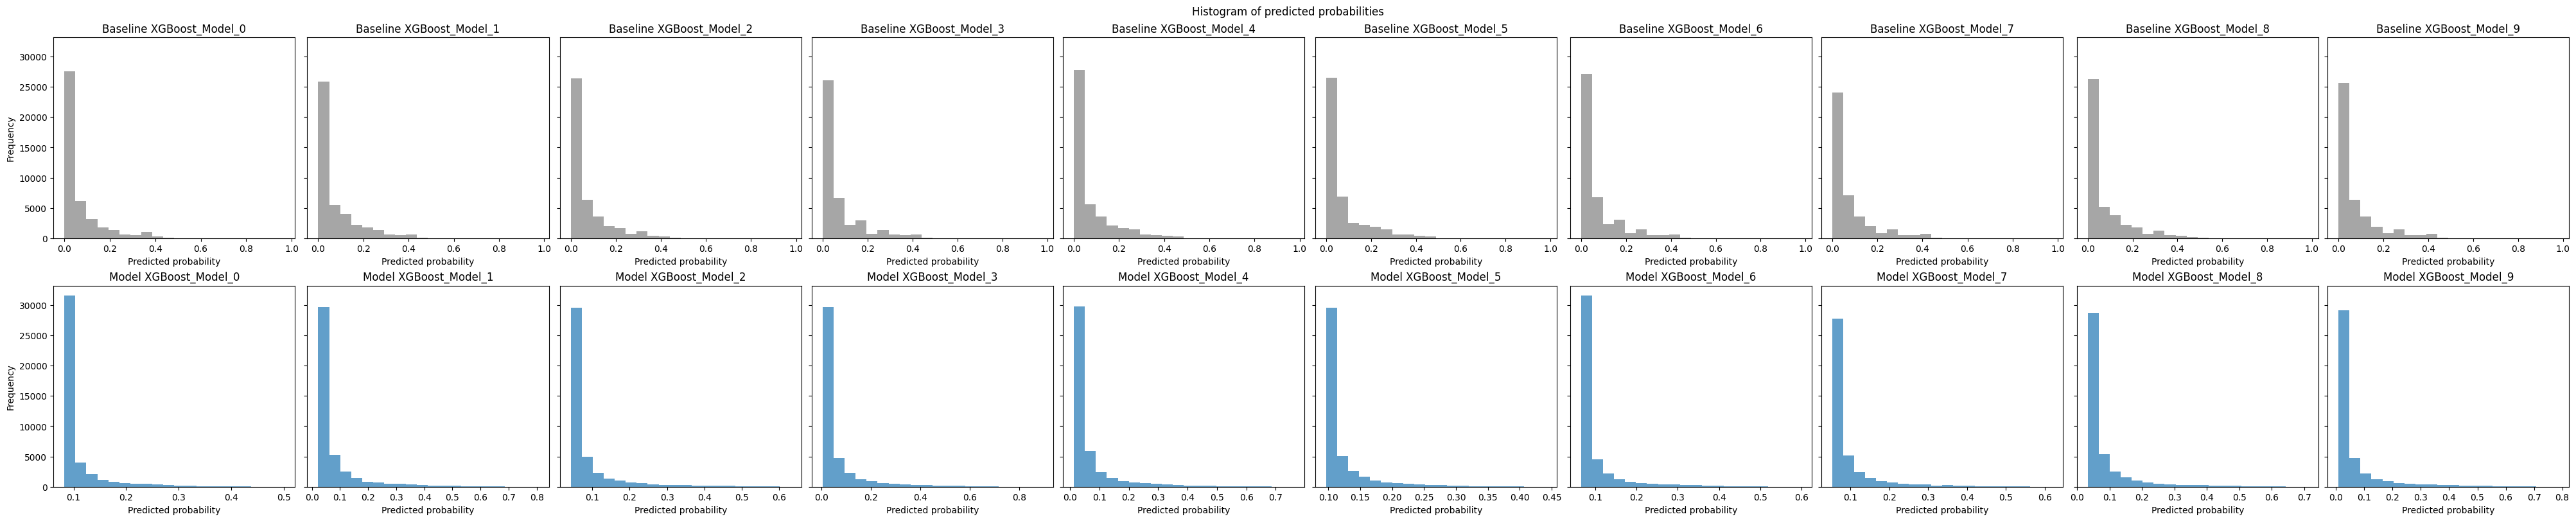

In [9]:
model_configs = []

for i in range(10):
    data = pd.read_parquet(f"data/split_datasets_xgb_sets/data_split_{i}.parquet")
    
    train = data[data['cv_split'] != 'test']
    test = data[data['cv_split'] == 'test']

    test = test[test['ioh_in_leading_time']==0]
    test = test[test['ioh_at_time_t']==0]
    
    features_names = list(train.columns)[:-8]
    
    # Add the config for this model
    model_configs.append({
        'test_data': test,
        'train_data': train,
        'model_filename': f'xgboost_model_{i}.json',
        'features_names': features_names,
        'name': f'XGBoost_Model_{i}',
        'model_type': 'xgboost'
    })

tester = TestModel(
    model_configs=model_configs,
    output_name="XGBoost_Models_Comparison")

tester.run(True, True)

## TSFEL Models + XGBoost Model

Model XGBoost_Model_TSFEL loaded
Number of points in test data: 41334
Prevalence of hypotension: 5.45%
---
Model XGBoost_Model_PCA_TSFEL loaded
Number of points in test data: 41334
Prevalence of hypotension: 5.45%
---
Model XGBoost_Model loaded
Number of points in test data: 41334
Prevalence of hypotension: 5.45%
---
Computing baseline for XGBoost_Model_TSFEL...


100%|██████████| 200/200 [00:12<00:00, 16.03it/s]


Computing baseline for XGBoost_Model_PCA_TSFEL...


100%|██████████| 200/200 [00:12<00:00, 16.31it/s]


Computing baseline for XGBoost_Model...


100%|██████████| 200/200 [00:12<00:00, 16.42it/s]


Testing model XGBoost_Model_TSFEL...


100%|██████████| 200/200 [00:14<00:00, 14.20it/s]


Testing model XGBoost_Model_PCA_TSFEL...


100%|██████████| 200/200 [00:13<00:00, 14.97it/s]


Testing model XGBoost_Model...


100%|██████████| 200/200 [00:14<00:00, 13.96it/s]




Results for Test TSFEL

===== Results for XGBoost_Model_TSFEL =====
Baseline:
AUC: 0.83 (0.01)
AP: 0.24 (0.01)
AUPRC: 0.29 (0.01)
Threshold: 66.71 [66.14, 67.50]
Recall: 41.0% [38.6%, 47.9%]
Precision: 36.7% (1.4%)
Specificity: 97.9% [97.6%, 98.1%]
NPV: 99.7% [99.7%, 99.7%]
F1-score: 39.3% [37.4%, 41.2%]

Model:
AUC: 0.86 (0.00)
AP: 0.30 (0.01)
AUPRC: 0.38 (0.01)
Threshold: 0.41 [0.39, 0.41]
Recall: 41.0% [40.9%, 41.1%]
Precision: 41.7% (1.7%)
Specificity: 98.2% (0.1%)
NPV: 99.7% [99.7%, 99.7%]
F1-score: 41.3% (0.9%)
----------------------------

===== Results for XGBoost_Model_PCA_TSFEL =====
Baseline:
AUC: 0.83 (0.01)
AP: 0.24 (0.01)
AUPRC: 0.29 (0.01)
Threshold: 66.71 [66.14, 67.50]
Recall: 41.0% [38.6%, 47.9%]
Precision: 36.7% (1.4%)
Specificity: 97.9% [97.6%, 98.1%]
NPV: 99.7% [99.7%, 99.7%]
F1-score: 39.3% [37.4%, 41.2%]

Model:
AUC: 0.84 (0.00)
AP: 0.27 (0.01)
AUPRC: 0.37 (0.01)
Threshold: 0.40 [0.40, 0.41]
Recall: 41.0% [40.9%, 41.1%]
Precision: 37.9% (1.6%)
Specificity: 97.9

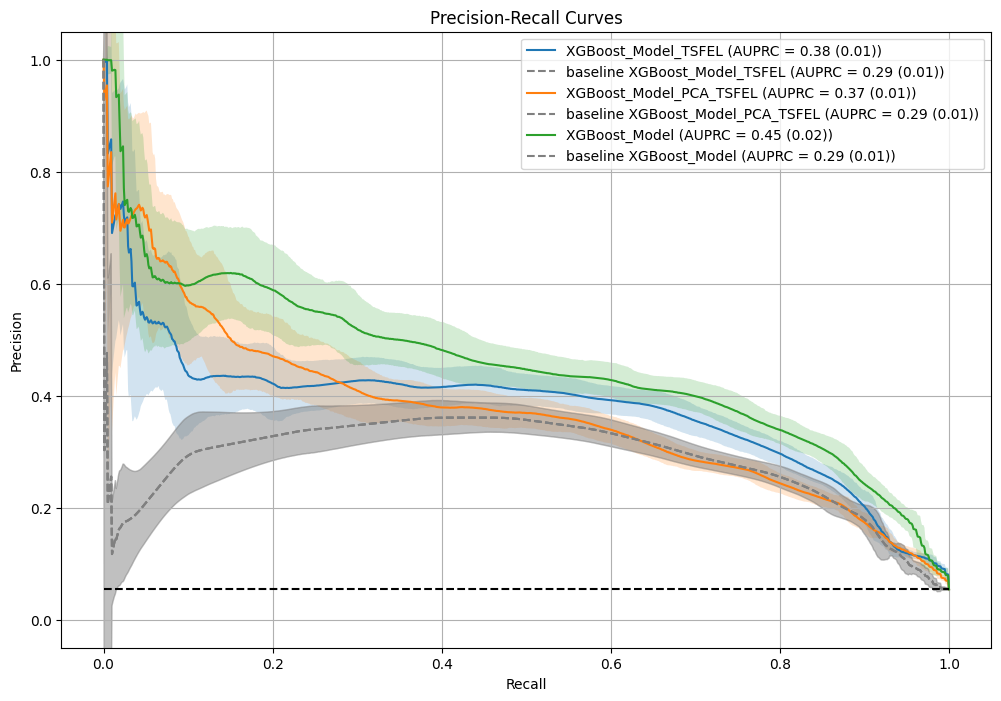

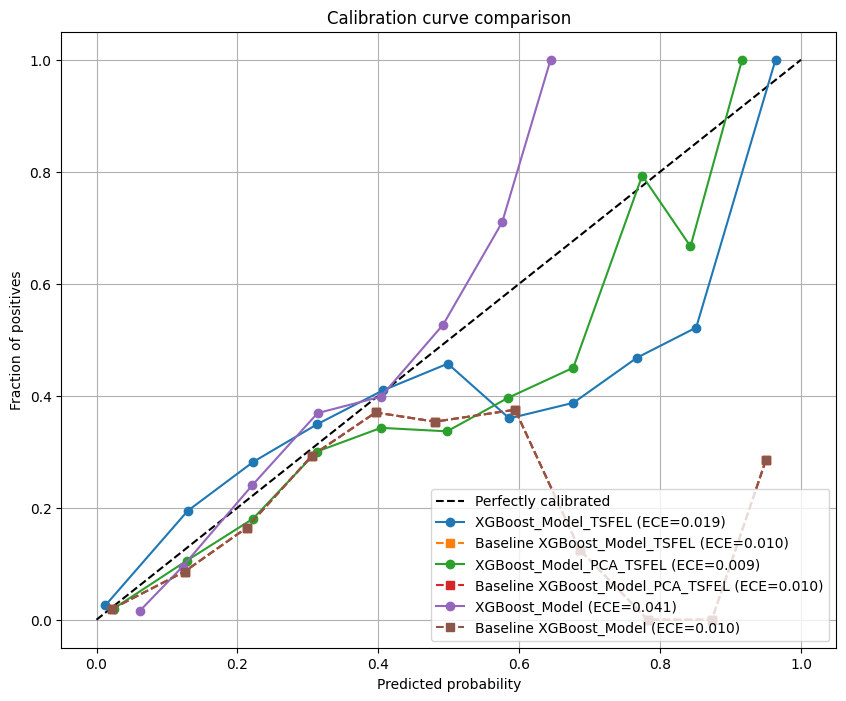

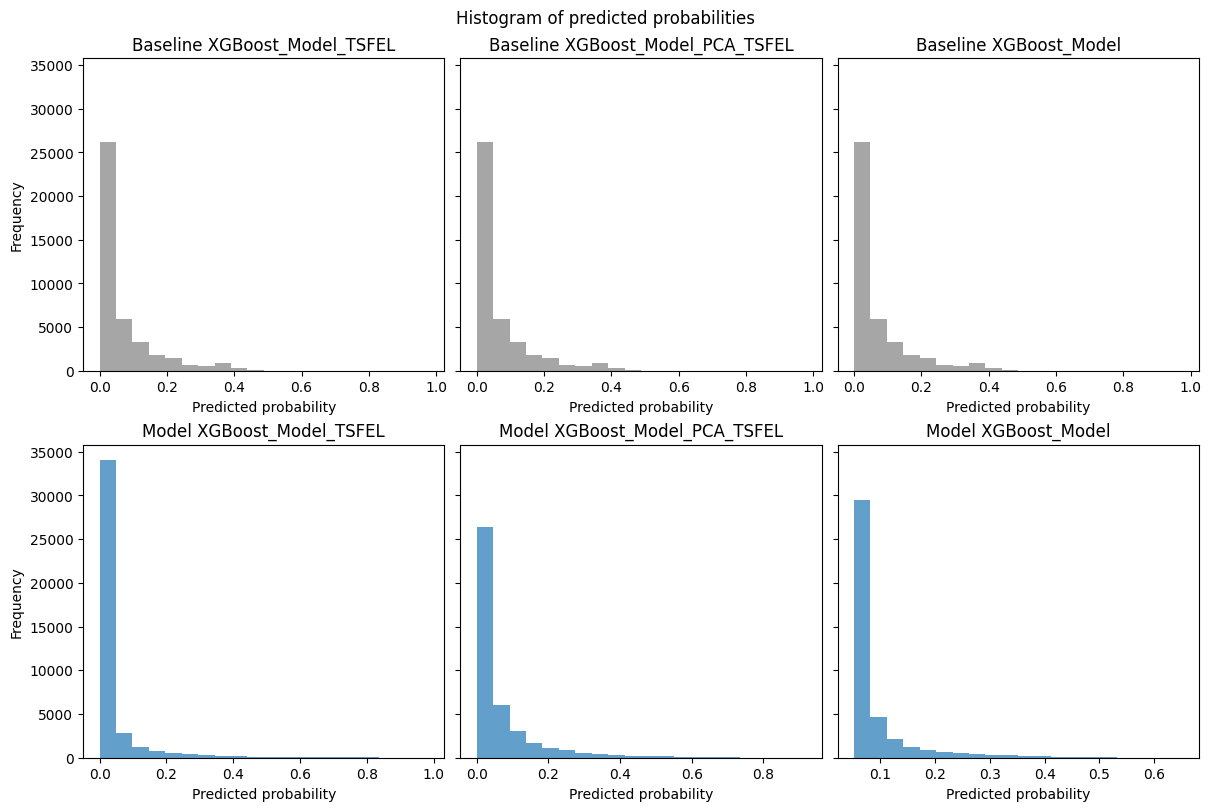

In [2]:
test2 = pd.read_parquet("data/features_extraction_tsfel/test_features_tsfel.parquet")
train2 = pd.read_parquet("data/features_extraction_tsfel/train_features_tsfel.parquet")
features_names2 = list(test2)[:-4]

test = pd.read_parquet("data/features_extraction_integrated_2windows/test.parquet")
train = pd.read_parquet("data/features_extraction_integrated_2windows/train.parquet")
features_names = list(test)[:-4]

test3 =pd.read_parquet("data/features_extraction_tsfel/pca_results/test_pca.parquet")
train3 = pd.read_parquet("data/features_extraction_tsfel/pca_results/train_pca.parquet")
features_names3 = list(test3)[:-4]

model_configs = [    
    {
        'test_data': test2,
        'train_data': train2,
        'model_filename': 'xgb_30s_tsfel.json',
        'features_names': features_names2,
        'name': 'XGBoost_Model_TSFEL',
        'model_type': 'xgboost'
    },
    {
        'test_data': test3,
        'train_data': train3,
        'model_filename': 'xgb_30_s_pca_tsfel.json',
        'features_names': features_names3,
        'name': 'XGBoost_Model_PCA_TSFEL',
        'model_type': 'xgboost'
    },
    {
        'test_data': test,
        'train_data': train,
        'model_filename': 'xgb_30_s_reg_holt_med.json',
        'features_names': features_names,
        'name': 'XGBoost_Model',
        'model_type': 'xgboost'
    }
]

tester = TestModel(
    model_configs=model_configs,
    output_name="Test TSFEL")

tester.run(True, True)

## Evaluation of our models on the CHU (external) dataset 

In [ ]:
test = pd.read_parquet("data/features_extraction_chu/data.parquet")
train = pd.read_parquet("data/features_extraction_integrated_2windows/train.parquet")

features_names = list(train)[:-4]

model_configs = [
    {
        'test_data': test,
        'train_data': train,
        'model_filename': 'rotation_classifier_opt_reg_holt_med.pkl',
        'features_names': features_names,
        'name': 'RotationForest_Model',
        'model_type': 'other' 
    },
    {
        'test_data': test,
        'train_data': train,
        'model_filename': 'xgb_30_s_reg_holt_med.json',
        'features_names': features_names,
        'name': 'XGBoost_Model',
        'model_type': 'xgboost'
    },
    {
        'test_data': test,
        'train_data': train,
        'model_filename': 'STACK_30s_reg_holt_med_2.pkl',
        'features_names': features_names,
        'name': 'Stacking_Model',
        'model_type': 'other'
    },
    {
        'test_data': test,
        'train_data': train,
        'model_filename': 'super_xgb_11_folds_test_default_params_w_features_extraction.pkl',
        'features_names': features_names,
        'name': 'Test_SuperXGBoost_features',
        'model_type': 'super_model'
    }
]

tester = TestModel(
    model_configs=model_configs,
    output_name="Comparison")

tester.run(True, True)

In [ ]:
test = pd.read_parquet("data/features_extraction_chu/data.parquet")
train = pd.read_parquet("data/features_extraction_integrated_2windows/train.parquet")

features_names = list(train)[:-4]

test2 = pd.read_parquet("data/features_extraction_trends_CHU/data.parquet")
train2 = pd.read_parquet("data/features_extraction_trends/train.parquet")
features_names2 = list(train2)[:-4]

test3 = pd.read_parquet("data/features_extraction_test_categoricals/data.parquet")
train3 = pd.read_parquet("data/features_extraction_test_categoricals/train.parquet")
features_names3 = list(train3)[:-4]

model_configs = [
    {
        'test_data': test3,
        'train_data': train3,
        'model_filename': 'xgb_30_s_test_04_06.json',
        'features_names': features_names3,
        'name': 'XGBoost_Model_Categoricals',
        'model_type': 'xgboost'
    },
    {
        'test_data': test,
        'train_data': train,
        'model_filename': 'xgb_30_s_reg_holt_med.json',
        'features_names': features_names,
        'name': 'XGBoost_Model',
        'model_type': 'xgboost'
    },
    {
        'test_data': test2,
        'train_data': train2,
        'model_filename': 'xgb_30_s_trend.json',
        'features_names': features_names2,
        'name': 'XGBoost_Model_Trends',
        'model_type': 'xgboost'
    },
]

tester = TestModel(
    model_configs=model_configs,
    output_name="Comparison")

tester.run(True, True)